In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import ast
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from fonctions import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
def delete_empty_values(dictionary):
    keys_to_delete = []
    for key, value in dictionary.items():
        if not value:
            keys_to_delete.append(key)
    for key in keys_to_delete:
        dictionary.pop(key)
def remove_character_from_values(dictionary, character):
    for key, value in dictionary.items():
        if isinstance(value, str):
            dictionary[key] = value.replace(character, '')

In [3]:
def remove_empty_strings(lst):
    return [item for item in lst if item != '']
def remove_chars(string_list, chars_to_remove):
    pattern = re.compile(chars_to_remove)
    return [pattern.sub("", s) for s in string_list]

chars_to_remove = r"['|','©']"

def join(liste):
    return '. '.join(liste)
def join_without_point(liste):
    return ' '.join(liste)
def split(texte):
    return texte.split()

In [4]:
def create_wordcloud(text_data):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    wordcloud.to_file('wordcloud.png')
    plt.show()

In [5]:
def topic_list(text):
    text = text.split(';')
    for i in range(len(text)):
        index = text[i].index('(')
        text[i] = text[i][:index]
        text[i] = text[i].replace(' ','')
    for i in range(len(text)):
        if ',' in text[i]:
            split_values = text[i].split(',')
            text.pop(i)
            for j in range(len(split_values)):
                text.insert(i+j, split_values[j])
    text = sorted(list(set(text)))
    return text

In [6]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'

In [7]:
df_PDV = pd.read_excel(file)

In [8]:
df = pd.DataFrame({'texts':df_PDV['textes'],'clean_PDV': df_PDV['textes'].apply(clean_text)})

In [9]:
df['clean'] = df['clean_PDV'].apply(lambda x:remove_chars(x,chars_to_remove)).apply(remove_empty_strings)
df['tolemme'] = df['clean'].apply(join)
df['livre'] = df_PDV['Livre']

In [10]:
pdv = {}
for i in range(len(df)):
    pdv[f'pdv_{i+1}'] = df['tolemme'].tolist()[i]

In [11]:
x = list(pdv.values())

In [ ]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)

liste_dic = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        liste_dic.append(dic)

fatal: HEAD n'est pas un nom d'objet valide
  6%|██▎                                       | 20/363 [00:31<06:27,  1.13s/it]

In [14]:
'''stopwords_list = [
    'ab', 'ac', 'ad', 'adhic', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur',
    'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam',
    'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne',
    'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare',
    'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo',
    'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum',
    'ubi', 'uel', 'uero','.'
]
'''

In [13]:
#poslist = ['NOMcom','VER','ADJqua','ADV']

In [17]:
"""liste_finale = []

for i in tqdm(liste_dic):
    liste_sentence = []
    for j in i:
        if j.get('pos') in poslist:
            liste_sentence.append(j.get('lemma'))
    liste_finale.append(liste_sentence)"""

100%|██████████████████████████████████████| 363/363 [00:00<00:00, 22036.94it/s]


In [19]:
'''data = pd.DataFrame({'texts':df['texts'],'stop':liste_finale,'dic':liste_dic})
data.to_excel('pdv_stopwords.xlsx')'''

In [57]:
liste_finale = []

for i in tqdm(liste_dic):
    liste_sentence = []
    for j in i:
        liste_sentence.append(j.get('lemma'))
    liste_finale.append(liste_sentence)
liste_pos = []

for i in tqdm(liste_dic):
    liste_part = []
    for j in i:
        liste_part.append(j.get('pos'))
    liste_pos.append(liste_part)

100%|██████████████████████████████████████| 363/363 [00:00<00:00, 31867.47it/s]


In [58]:
df['lemma'] = liste_finale
df['lemma'] = df['lemma'].apply(join_without_point)
df['pos'] = liste_pos
df['pos'] = df['pos'].apply(join_without_point)
df['dic'] =  liste_dic

In [59]:
Counter(noms.split()).most_common()

[('pars', 285),
 ('fides2', 251),
 ('regnum', 234),
 ('imperium', 219),
 ('deuotio', 202),
 ('fidelitas', 199),
 ('filius', 194),
 ('seruitium', 181),
 ('terra', 172),
 ('gratia', 169),
 ('tempus1', 163),
 ('littera', 163),
 ('ciuitas', 159),
 ('maiestas', 159),
 ('fidelis2', 158),
 ('honor', 151),
 ('curia', 151),
 ('res', 142),
 ('dominus', 140),
 ('princeps1', 139),
 ('negotium', 136),
 ('ecclesia', 130),
 ('causa', 128),
 ('pater', 121),
 ('persona', 118),
 ('mandatum', 116),
 ('iustitia', 113),
 ('ius1', 111),
 ('pax', 106),
 ('culmen', 97),
 ('homo', 95),
 ('rex', 95),
 ('locus', 94),
 ('potentia', 94),
 ('nuntius1', 94),
 ('deus', 92),
 ('castra2', 92),
 ('dies', 89),
 ('manus1', 87),
 ('consilium', 86),
 ('opus1', 86),
 ('bonum', 82),
 ('potestas', 81),
 ('uis', 80),
 ('uotum', 77),
 ('excellentia', 76),
 ('serenitas', 76),
 ('hostis', 75),
 ('uoluntas', 74),
 ('uerbum', 73),
 ('officium', 71),
 ('nomen', 70),
 ('celsitudo', 69),
 ('frater', 68),
 ('iudicium', 67),
 ('status1',

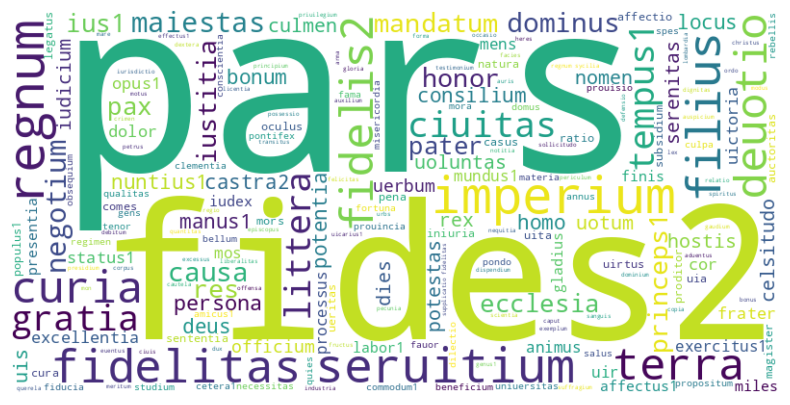

In [60]:
noms = []

for i in range(len(liste_dic)):
    inter = []
    for dic in liste_dic[i]:
        if dic['pos'] == 'NOMcom':
            inter.append(dic['lemma'])
    noms.append(inter)
noms = [item for sublist in noms for item in sublist]
noms = ' '.join(noms)


create_wordcloud(noms)


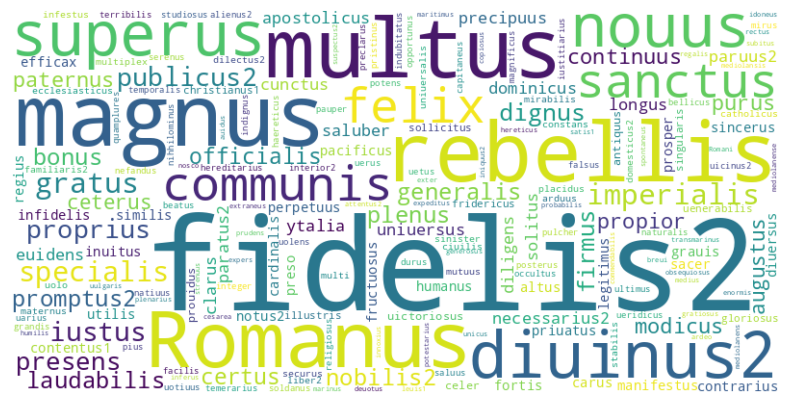

In [61]:
adj = []

for i in range(len(liste_dic)):
    inter = []
    for dic in liste_dic[i]:
        if dic['pos'] == 'ADJqua':
            inter.append(dic['lemma'])
    adj.append(inter)
adj = [item for sublist in adj for item in sublist]
adj = ' '.join(adj)

create_wordcloud(adj)

In [62]:
Counter(adj.split()).most_common()

[('fidelis2', 298),
 ('magnus', 104),
 ('multus', 94),
 ('rebellis', 91),
 ('Romanus', 88),
 ('diuinus2', 72),
 ('superus', 68),
 ('sanctus', 68),
 ('nouus', 65),
 ('communis', 64),
 ('felix', 62),
 ('imperialis', 62),
 ('gratus', 60),
 ('specialis', 57),
 ('iustus', 52),
 ('proprius', 50),
 ('publicus2', 50),
 ('generalis', 47),
 ('presens', 45),
 ('dignus', 42),
 ('promptus2', 40),
 ('bonus', 39),
 ('laudabilis', 39),
 ('plenus', 38),
 ('firmus', 38),
 ('nobilis2', 37),
 ('officialis', 37),
 ('certus', 37),
 ('modicus', 35),
 ('paternus', 34),
 ('continuus', 34),
 ('propior', 33),
 ('purus', 32),
 ('uniuersus', 31),
 ('augustus', 31),
 ('ceterus', 28),
 ('apostolicus', 27),
 ('solitus', 27),
 ('clarus', 27),
 ('notus2', 27),
 ('ytalia', 26),
 ('longus', 26),
 ('necessarius2', 26),
 ('precipuus', 26),
 ('saluber', 25),
 ('dominicus', 25),
 ('euidens', 25),
 ('cunctus', 24),
 ('sacer', 24),
 ('diligens', 24),
 ('paratus2', 24),
 ('paruus2', 24),
 ('perpetuus', 24),
 ('fortis', 23),
 ('

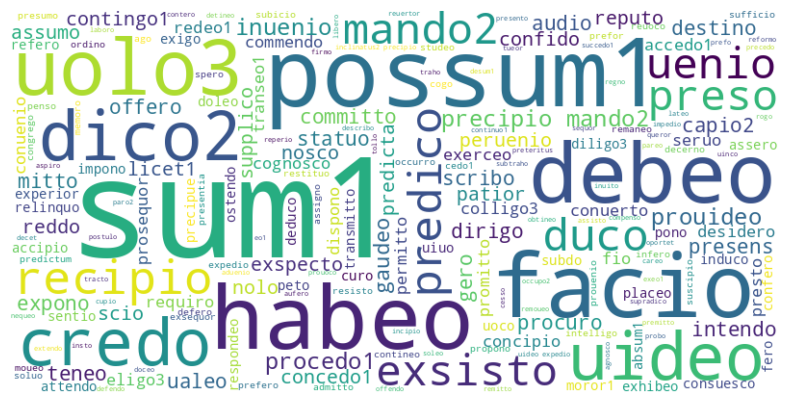

In [63]:
verbs = []

for i in range(len(liste_dic)):
    inter = []
    for dic in liste_dic[i]:
        if dic['pos'] == 'VER':
            inter.append(dic['lemma'])
    verbs.append(inter)
verbs = [item for sublist in verbs for item in sublist]
verbs = ' '.join(verbs)



create_wordcloud(verbs)

In [64]:
Counter(verbs.split()).most_common()

[('sum1', 780),
 ('possum1', 286),
 ('habeo', 239),
 ('facio', 237),
 ('debeo', 210),
 ('mando2', 196),
 ('uolo3', 181),
 ('uideo', 149),
 ('dico2', 140),
 ('credo', 134),
 ('recipio', 121),
 ('duco', 116),
 ('precipio', 113),
 ('prouideo', 104),
 ('predico', 99),
 ('uenio', 93),
 ('do', 93),
 ('destino', 88),
 ('preso', 86),
 ('exsisto', 85),
 ('inuenio', 80),
 ('procedo1', 79),
 ('gaudeo', 69),
 ('audio', 64),
 ('statuo', 64),
 ('presens', 63),
 ('expono', 62),
 ('capio2', 62),
 ('teneo', 61),
 ('intendo', 60),
 ('ualeo', 59),
 ('offero', 59),
 ('committo', 57),
 ('dirigo', 56),
 ('mitto', 55),
 ('requiro', 54),
 ('scribo', 53),
 ('nosco', 53),
 ('gero', 53),
 ('procuro', 52),
 ('concedo1', 51),
 ('supplico', 51),
 ('peruenio', 49),
 ('licet1', 49),
 ('contingo1', 49),
 ('exhibeo', 49),
 ('patior', 48),
 ('exspecto', 47),
 ('scio', 47),
 ('confido', 47),
 ('assumo', 46),
 ('expedio', 46),
 ('reddo', 44),
 ('reputo', 44),
 ('nolo', 43),
 ('predicta', 43),
 ('concipio', 43),
 ('seruo',

In [29]:
output_directory = "text_documents"
os.makedirs(output_directory, exist_ok=True)

# Iterate through the DataFrame and save each text as a separate document
for index, row in df.iterrows():
    text = row['lemma']
    document_name = f"pdv_{index + 1}.txt"
    document_path = os.path.join(output_directory, document_name)
    
    with open(document_path, 'w') as f:
        f.write(text)

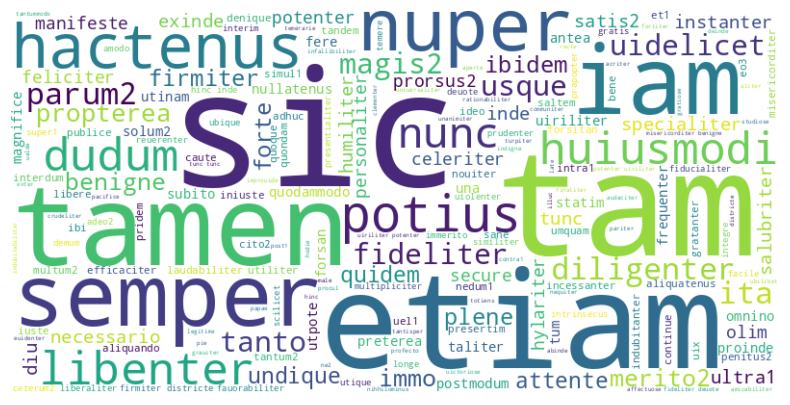

In [65]:
adv = []

for i in range(len(liste_dic)):
    inter = []
    for dic in liste_dic[i]:
        if dic['pos'] == 'ADV':
            inter.append(dic['lemma'])
    adv.append(inter)
adv = [item for sublist in adv for item in sublist]
adv = ' '.join(adv)

create_wordcloud(adv)

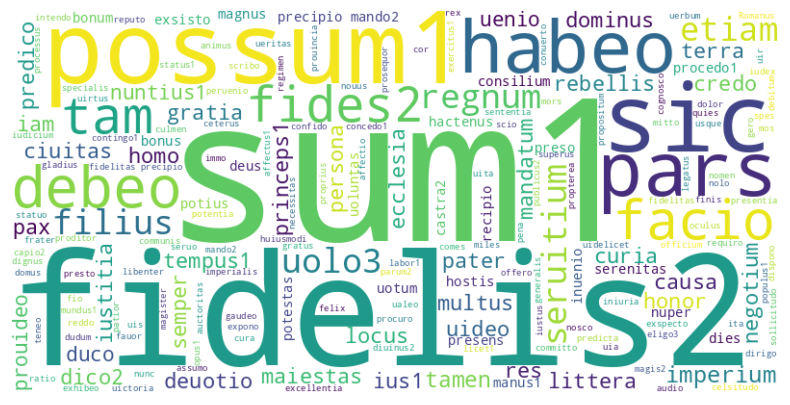

In [66]:
lemma = []

for i in range(len(liste_dic)):
    inter = []
    for dic in liste_dic[i]:
        if dic['pos'] == 'VER' or dic['pos'] == 'ADV' or dic['pos'] == 'ADJqua' or dic['pos'] == 'NOMcom':
            inter.append(dic['lemma'])
    lemma.append(inter)
lemma = [item for sublist in lemma for item in sublist]
lemma = ' '.join(lemma)



create_wordcloud(lemma)

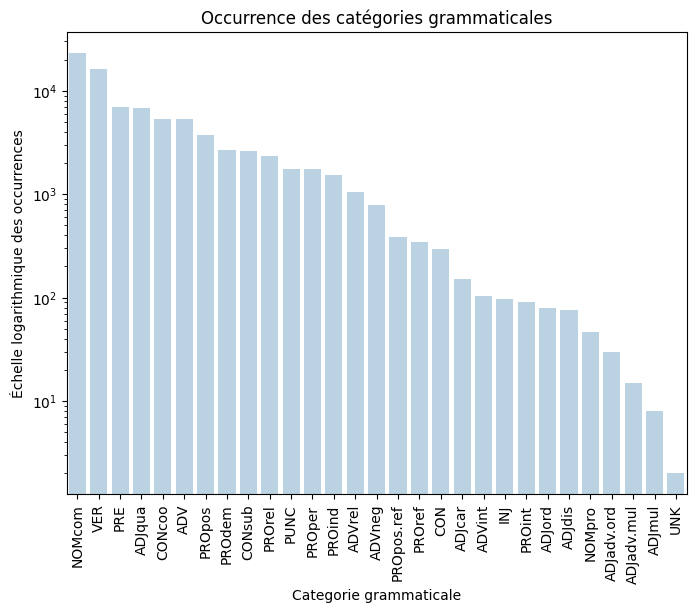

In [67]:
pos = df['pos'].apply(split)
pos = [item for sublist in pos for item in sublist]
pos_dict = dict(Counter(pos).most_common())
pos_df = pd.DataFrame(list(pos_dict.items()), columns=["pos", "occurrence"])

custom_palette = ["#b4d3e8"] * len(df)
# Create the bar plot with log-scale y-axis using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='pos', y='occurrence', data=pos_df,palette=custom_palette)
plt.yscale('log')  # Set the y-axis to log scale
plt.xlabel('Categorie grammaticale')
plt.xticks(rotation = 90)
plt.ylabel('Échelle logarithmique des occurrences')
plt.title('Occurrence des catégories grammaticales')

plt.savefig('Occ_pos.png',dpi=300)
plt.show()

In [68]:
abondance = 'abundans (abondant) ; abundanter (abondamment) ; abundantia (abondance) ; abundantius (très abondamment) ; abundo (être plein de, abonder) ; accresco (accroître) ; adaugeo (augmenter) ; affluencia (affluence) ; affluenter (avec affluence, abondance) ; ager (champ) ; alimentum (aliment, ressources matérielles) ; amplio (augmenter) ; amplior (plus ample, plus large) ; amplius (amplement, largement) ; augeo (augmenter) ; augmentatio (augmentation, accroissement) ; augmento (augmenter, accroître) ; augmentum (augmentation) ; copia (abondance) ; copiosior, copiosius (plus abondamment) ; copiosius (très abondemment) ; cresco (croître) ; diminuo (diminuer) ; diminutus (diminué) ; dives (riche) ; egestas (pauvreté, indigence) ; fertilitas (fertilité) ; fructuosus (fructueux, porteur de fruit) ; fructus (fruit) ; frumentum (froment) ; germen (semence) ; germino (germer, croître) ; granatus (bien pourvu en grains) ; horreum (grenier) ; hortus (jardin, verger) ; incrementum (accroissement) ; inedia (privation, manque de nourriture) ; liberalis (généreux, libéral) ; liberalitas (générosité, libéralité) ; liberaliter (généreusement, libéralement) ; liberalius (très généreusement, très libéralement) ; locuples (enrichi, riche) ; locupleto (enrichir) ; magnifice (magnifiquement) ; magnificentia (magnificence) ; magnifico (exalter, surhausser, magnifier) ; magnificus (exaltant, magnifique) ; magnitudo (grandeur) ; major (plus grand) ; meto (récolter) ; munifice (libéralement, généreusement) ; munificentia (libéralité, munificence, générosité) ; munificentior (très libéralement) ; munificus (libéral, généreux) ; oleum (huile) ; pauper (pauvre) ; paupertas (pauvreté) ; pinguior (rendu plus gras, plus abondant, plus riche) ; prodigalitas (prodigalité, dissipation des biens) ; profectus (profit) ; prospere (prospèrement) ; prosperitas (prospérité) ; prosperius (très prospèrement) ; prospero (prospérer) ; prosperus (prospère) ; ros (rosée) ; semino (semer) ; sustento (soutenir, sustenter) thesaurus (trésor) ; uber (abondant, fertile) ; uberior (très abondant) ; uberius (très abondamment) ; ubertas (abondance, fertilité) ; victualia (vivres, denrées comestibles) ; victus (nourriture, subsistance) ; vinum (vin).'
joie = 'beatissimus (bienheureux (pour un saint)) ; beatus (id.) ; benigne (bénignement) ; benignitas (bénignité) ; benigniter (bénignement) ; benivolentia (bienveillance) ; benivolus (bienveillant) ; bravium (récompense, prix) ; consolo (consoler) ; consolatrix (consolatrice (Vierge c.)) ; contentus (content, satisfait) ; cordialis (cordial, venant du cœur) ; delector (se complaire à, avoir plaisir à) ; dilectio (plaisir, délectation, joie à faire) ; dilector (amant (de la majesté royale)) ; dilectus (aimé, favorisé, chéri) ; diligens (diligent, zélé dans la joie) ; diligenter (diligemment, avec enthousiasme) ; diligentia (diligence, enthousiasme) ; diligentius (très diligemment, avec beaucoup d’enthousiasme) ; diligo (aimer, chérir) ; dulcedo (douceur) ; dulcor (douceur) ; felicitas (félicité, joie vive) ; feliciter (avec félicité) ; felicius (avec une grande félicité) ; felix (très heureux) ; flos (fleur) ; fons (source) ; fructifico (donner des fruits) ; fructuosus (qui donne des fruits) ; fructus (fruit) ; fruor (jouir de) ; gaudeo (se réjouir de) ; gaudium (joie, réjouissance) ; germino (germer, faire croître) ; gloria (gloire) ; glorior (se glorifier de, être nimbé par la gloire de) ; gloriose (glorieusement) ; gloriosissimus (id., avec une gloire suprême) ; gloriosius (très glorieusement) ; gloriosus (glorieux) ; gratitudo (gratitude) ; gratus (dont on sait gré) ; lenimentum (allègement, soulagement) ; lenitas (douceur, légèreté) ; letor (être joyeux, se réjouir de) ; libens (dispos, volontaire) ; libenter (volontiers) ; libentior (très volontaire) ; libentius (très volontiers) ; oblectatio (divertissement, joie mondaine) ; placeo (plaire) ; redoleo (embaumer, dégager une bonne odeur) ; refloreo (refleurir) ; relevamen (soulagement, restauration) ; relevo (soulager, restaurer) ; salus (salut (du genre humain)) ; salutaris (porteur de salut) ; splendor (splendeur) ; voluptas (volupté, plaisir).'
amour = 'accendo (au passif, être enflammé par la dévotion) ; adoro (adorer, vénérer) ; affectio (affection, dévotion) ; affecto (avoir en affection, dévotion) ; affectus (adj. d’affection, de dévotion , subst. affection, dévotion) ; alo (nourrir) ; amabilis (aimable, digne d’être aimé) ; amator (amant, qui aime) ; amenitas (caractère de ce qui est digne d’ête aimé) ; amicabiliter (avec amitié) ; amicus (ami) ; amor (amour, dilection) ; amplector (embrasser) ; anxio (être angoissé (pour les sujets)) ; auxilium (secours) ; benivolencia (bienveillance) ; benivolus (bienveillant) ; bonitas (bonté) ; carior (particulièrement cher) ; caritas (charité, participation) ; caritative (avec charité) ; compatior (compatir, souffrir avec) ; condoleo (pleurer avec, partager la souffrance de) ; conforto (consoler, ranimer) ; confoveo (ranimer) ; consolo (consoler) ; cor (cœur) ; cordialis (plein de cœur, cordial) ; cura (sollicitude, soin) ; devote (dévotement, avec dévouement) ; devotio (dévotion, affection, vénération) ; devotius (très dévotement) ; devotus (dévot, fidèle, zélé) ; dilector (ami, qui chéri) ; dilectus (aimé, qui est chéri) ; diligens (diligent, ardent, aimant, zélé) ; diligenter (diligemment) ; diligentia (diligence, zèle) ; diligentius (très diligemment) ; diligo (aimer, chérir) ; fervens (fervent) ; ferventer (de manière fervente) ; ferventius (de manière très fervente) ; ferveo (être fervent dans l’action de) ; fervidus (fervent, zélé) ; fervor (ferveur) ; fidelis (fidèle) ; fidelitas (fidélité) ; fideliter (fidèlement) ; fides (foi) ; fiducia (confiance) ; filialis (filial (dévotion f.le)) ; fraternitas (fraternité) ; inclinatio (inclination) ; libenter (volontiers) ; libentior (qui fait très volontiers) ; libentius (très volontiers) ; paternalis (paternel (amour p.)) ; prefero (préférer, faire passer avant d’autres) ; promptus (prompt (p.te affection)) ; reverencia (révérence, respect, adoration emplis de crainte) ; reventer (avec révérence) ; revereor (révérer) ; sanguis (sang (liens du s.)) ; sinceritas (sincérité (de la dilection, de la foi)) ; sincerus (sincère (affection, dévotion s.)) ; socius (compagnon) ; sollicite (avec sollicitude) ; sollicito (emplir de sollicitude, pousser à une action) ; sollicitudo (sollicitude) ; sollicitus (plein de sollicitude) ; specialis (spécial, particulier (affection, dévotion s.)) ; specialitas (particularité (d’un sentiment)) ; specialiter (spécialement) ; specialius (très spécialement) ; subvenio (venir en aide) ; subventio (aide pécunière) ; succendo (au passif, brûler (d’affection, de dévotion)) ; venerandus (vénérable) ; veneratio (vénération) ; venero (vénérer) ; veneror (vénérer) ; vinculum (lien (de fidélité, du sang, du mariage, etc.)) ; viscerosus (des entrailles, qui touche aux entrailles) ; zelator (zélateur, chérisseur) ; zelo (chérir, être zélé pour) ; zelum (zèle, ardeur pour). '
verticalité = 'altior (plus haut, fort haut) ; altissimus (le Très-Haut) ; altitudo (hauteur, hautesse, altesse) ; altius (fort haut) ; altum (hauteur) ; apex (sommet, faîte) ; aquila (aigle) ; assurgo (se dresser pour une action) ; attollo (exalter) ; caput (tête, chef) ; celestia (les choses d’en haut, célestes) ; celestis/celestus (céleste) ; celitus (du haut des cieux) ; celsitudo (hautesse, altesse) ; celum (ciel) ; conscendo (monter sur) ; culmen (comble, faîte, sommet) ; cumulus (accumulation, comble) ; elevo (élever) ; exaltatio (exaltation, surhaussement, élévation) ; exalto (exalter, surhausser, élever) ; excelsa (les Cieux) ; excelsus (élevé au plus haut des Cieux, très-haut) ; extollo (surhausser, élever, exalter) ; fastigium (comble, faîte) ; gradus (degré) ; grandior (plus grand, plus haut) ; inclino (s’incliner vers) ; insurgo (se dresser pour un acte) ; precelsus (surélevé, suréminent) ; proveho (jucher, exalter, surhausser, transporter vers le haut) ; sol (le soleil dont descend la grâce) ; solium (le trône du haut duquel le roi domine) ; stella (l’étoile du matin, symbole de la Vierge de miséricorde) ; superior (qui est plus haut) ; superius (supérieur, céleste) ; supernus (supérieur, céleste) ; supero (dépasser) ; sursum (vers le haut). '
corps = 'auris (oreille) ; brachium (bras) ; caput (tête) ; caro (chair) ; cor (cœur) ; corpus (corps) ; dextera (dextre) ; incorporalis (incorporel) ; labium (lèvre) ; lingua (langue) ; manus (main) ; membrum (membre) ; oculate (de ses propres yeux) ; oculus (œil) ; os (os) ; palmus (paume de la main) ; pectus (poitrine) ; precordia (diaphragme, cœur, organes centraux de la poitrine) ; sanguis (sang) ; sexus (le sexe, pour la gent féminine) ; sinus (le sein) ; sudor (sueur, transpiration, effort) ; uterus (ventre, utérus) ; viscerosus (qui touche aux entrailles, qui remue les entrailles) ; visio (la vision) ; vulnus (blessure). '
Dieu = 'adjutrix (adjutrice, comme qualificatif de la Vierge) ; almus (bénin, bénéfique, qualificatif de saints) ; altissimus (Très-Haut) ; amator (Dieu, amant et auteur de la paix) ; apostolus (apôtre) ; aquila (aigle, symbole de Dieu) ; auctor (auteur, fondateur) ; beatissimus (bienheureux, qualificatif de saint) ; beatus (bienheureux, qualificatif de saint) ; carno (chair (Dieu fait c.)) celestia (les Cieux) ; celum (ciel) ; Christus (Christ) ; confessor (confesseur (de la foi), qualificatif des saints) ; creator (créateur, qualificatif de Dieu) ; curia (cour céleste) ; Deus (dieu) ; Dominus (le Seigneur) ; dux (Christ comme chef, guide, duc) ; Dyonisius (saint Denis) ; Eleutherius (saint Éleuthère) ; Eva (Éve première parente) ; evangelista (évangéliste) ; excelsus (très-haut, qualificatif de Dieu) ; exercitus (armée, (Dieu des armées)) ; filius (Dieu, fils de Dieu) ; fons (Jésus, source de salvation) ; gloriosissimus (très glorieux, qualificatif de la Vierge et des saints) ; gloriosus (glorieux, qualificatif de la Vierge, des Évangélistes, des saints) ; immaculatus (immaculé, qualificatif de la Vierge) ; Johannes (Jean, évangéliste) ; laurea (laurier de la bénédiction divine) ; Luca (Luc, évangéliste) ; Ludovicus (saint Louis) ; majestas (majesté divine) ; Marchus (Marc, évangéliste) ; margarita (perle incorporelle des dogmes de l’Église) ; Maria (Marie, mère de Dieu) ; martyr (martyr) ; mater (mère Église, Marie, mère de miséricorde) ; Matheus (Matthieu, évangéliste) ; matutinus (matutinal, qualificatif de l’étoile du matin, symbole de Marie) ; omnipotens (Dieu omnipotent) ; pacificus (Dieu, prince faiseur de paix) ; paradisus (paradis) ; pater (Dieu le père) ; patior (souffrir la passion (pour Dieu)) ; patron (saint patron) ; princeps (Dieu, prince faiseur de paix) ; redemptor (Dieu rédempteur de l’humanité) ; regina (la Vierge, reine des cieux) ; rex (Dieu, roi des rois) ; Rusticus (saint Rustique) ; Sabaoth (Dieu des armées) ; Salvator (Dieu sauveur) ; sanctissimus (très saint) ; sanctus (saint, Saint) ; sedes (demeure céleste) ; sidereus (d’étoile, stellaire, qualificatif des demeures célestes) ; spiritus (le Saint-Esprit) ; sponsa (l’Église, épouse du Christ) ; sponsus (Christ, époux de l’Église) ; stella (l’étoile, symbole de Marie) ; supernus (céleste, très-haut) ; Ysaac (Ysaac) ; Yvo (saint Yves).'
jugement = 'accusator (accusateur) ; accusatus (accusé) ; aculeus (trait, aiguillon, pointe (des lois)) ; alienatio (aliénation de patrimoine) ; alienatus (aliéné) ; arrestum (arrêt du parlement) ; canon (canon ecclésiastique) ; clemens (clément) ; clementer (avec clémence) ; clementia (clémence) ; consuetudo (coutume, usage) ; corroboro (renforcer (justice et chevalerie se renforcent mutuellement)) ; delator (délateur) ; delictum (délit) ; dissuetudo (désuétude (des canons)) ; eque (équitablement, justement) ; equitas (équité, justice) ; excommunicatio (excommunication) ; executio (exécution, application de la justice) ; exerceo (exercer la justice) ; forefactum (forfait) ; franchisia (franchise) ; gratia (grâce) ; humiliter (humblement (implorer la grâce h.)) ; illegitime (illégitimement) ; judex (juge) ; judicialis (judiciaire) ; judicium (jugement) ; judico (juger) ; juridictio (juridiction) ; jus (droit) ; juste (avec justice) ; justiciabilis (justiciable) ; justifico (juger innocent) ; justissimus (très juste) ; justus (juste, équitable) ; legalis (légal) ; legatio (légation) ; legitimacio (légitimation) ; legitimus (légitime) ; lesio (entorse (au droit)) ; lex (loi) ; liberalis (généreux (dans l’exécution de la grâce)) ; liberalitas (libéralité, générosité (dans l’exercice de la grâce)) ; liberaliter (avec libéralité, générosité) ; liberalius (très libéralement, très généreusement) ; libertas (liberté, au sens de franchise) ; lis (querelle, procès) ; merus (pur, plein (effet de pure bonté)) ; ministro (administrer la justice) ; misericordia (miséricorde) ; misericorditer (avec miséricorde) ; misericors (miséricordieux) ; mitigo (tempérer (la rigueur de la justice)) ; nego (nier (la grâce aux suppliants)) ; norma (la norme, la loi) ; pena (peine, châtiment) ; prejudicium (préjudice (fait à la juridiction royale)) ; privilegium (privilège) ; querelose (avec caractère de plainte) ; recte (justement, correctement) ; rectitudo (rectitude, droit sens de justice) ; rectus (droit) ; rigor (rigueur (des lois, de la justice)) ; supplex (suppliant) ; supplicatio (supplique) ; suppliciter (en suppliant (implorer en s.)) ; supplico (supplier) ; tempero (tempérer (la rigueur de justice)) ; tribunal (tribunal) ; vindictam (vengeance). '
faute = 'anfractus (les crevasses (des querelles / procès)) ; audacia (audace (de faire des procès)) ; calliditas (ruse, fourbe) ; casus (cas, accident) ; cautela (pris en mal : fraude) ; collabor (chuter, dévier, être entraîné vers le mal) ; collapsus (déchu, qui a chuté, qui a fauté, qui a été entraîné au mal) ; conatu (un entraînement, une impulsion) ; continuo (continuellement (être entraîné à pêcher c.)) ; contrittus (contrit (délinquant c.)) ; convicium (scandale, insulte, altercation, etc.) ; cornu (la corne des superbes, rompue par la justice divine) ; crassans (tyran, malfaiteur) ; crimen (crime) ; criminosus (criminel) ; culpa (faute) ; damnificatus (damné) ; damno (damner) ; damnosus (damnable) ; damnum (le dégât, le dam) ; degenero (dégénérer, s’abâtardir) ; delictum (le délit, la faute) ; delinimentum (séduction (qui conduit à la faute)) ; delinquens (délinquant, fautif) ; delinquo (fauter, aller contre le droit) ; demeritum (démérite, incapacité à gagner des mérites auprès de la divinité) ; devio (dévier, s’écarter du droit chemin) ; discordo (dévier du droit chemin) ; diverto (id.) ; dolosus (frauduleux, trompeur) ; duricia (dureté des pêcheurs) ; elido (rompre (les cornes des orgueilleux)) ; facinus (crime, délit) ; falsus (faux, hypocrite) ; ferreus (de fer (dureté des pêcheurs)) ; fetidus (puant, qualifiant les boucs et brebis galeux) ; fomes (aliment du feu (de la cupidité)) ; fornicor (forniquer, s’adonner à la prostitution) ; fragilitas (fragilité (de la nature humaine, prompte au mal)) ; fraus (fraude) ; gravamen (oppression) ; hedo (bouc, symbole d’impureté) ; ignorantia (l’ignorance qui séduit) ; impietas (impiété) ; improbus (malhonnête, de mauvaise conduite) ; indebite (indûment) ; indebitus (indu, qui ne devrait pas être fait) ; iniquitas (iniquité) ; iniuria (injure, insulte, tort infligé contre tout droit) ; iniuriosus (injurieux, infligeant un tort contre tout droit) ; inquinamentum (pollution, souillure) ; insidia (ruse, traquenard) ; insidiosus (insidieux) ; insolentia (insulte) ; iracundia (colère) ; labes (glissade vers la faute, faute, chute dans la faute, écart) ; labilis (glissant (condition humaine glissant facilement vers le mal)) ; lapsus (chute (d’Adam)) ; limes (limite que le fautif dépasse) ; lubricus (glissant (vers la faute)) ; macula (tache d’opprobre) ; maculo (entacher d’opprobre) ; malefactum (le méfait) ; malicia (la méchanceté) ; malignans (le méchant) ; malignus (méchant, pervers) ; malum (le mal) ; malus (le mauvais, le méchant) ; mortiferus (porteur de mort, mortifère (le fruit de l’arbre de science)) ; nephandus (néfaste, maudit) ; nocens (coupable) ; nubes (nuage (de l’ignorance)) ; obtenebro (enténébrer : la faute d’Adam enténèbre l’esprit humain) ; odium (haine) ; offensa (offense) ; ovis (la brebis, quand elle est galeuse) ; patrator (auteur (d’un crime)) ; peccans (pécheur) ; peccator (pécheur) ; peccatum (péché) ; pecco (pêcher) ; penitens (pénitent) ; penitentia (pénitence) ; peniteo (se repentir) ; perfidus (perfide) ; perpetro (perpétrer, commettre (un crime)) ; perversi (les pervers, les méchants) ; perversitas (perversité, méchanceté, malice) ; pronus (prompt, enclin (au mal)) ; reus (coupable) ; sarcina (le fardeau (des péchés)) ; sceleratus (scélérat) ; scelus (crime) ; superbus (orgueilleux) ; temptacio (tentation) ; transgressor (transgresseur, outrepasseur de ses droits). '
gouvernement = 'assisto (assister (le roi)) ; committo (confier (le gouvernement) à) ; conamen (effort) ; confirmo (confirmer (un acte)) ; corrigo (corriger) ; decerno (décider, décréter) ; defendo (défendre) ; defensio (défense) ; defenso (défendre) ; deliberatio (délibération) ; diligentius (avec diligence) ; dispono (disposer, ordonner) ; dispositio (disposition, ordonnancement) ; domanium (domaine (de la couronne)) ; dominium (domaine où s’exerce l’autorité, autorité) ; dominor (dominer, régner) ; dominus (seigneur) ; domus (maison (parfois comme métaphore du royaume)) ; edictum (édit) ; executio (exécution (de la justice)) ; exequor (exécuter (la justice)) ; exerceo (exercer (le devoir, le gouvernement, la coutume)) ; exercitium (exercice) ; facere (faire) ; factum (fait, haut-fait, conduite, action) ; feliciter (heureusement (régner h.)) ; felix (heureux (gouvernement h.)) ; fundo (fonder) ; fungor (s’acquiter de, exercer) ; gesta (les gestes, hauts-faits (des rois)) ; gratia (grâce, cf. section suivante) ; gubernaculum (gouvernail, et par métaphore, gouvernement) ; guberno (gouverner) ; habena (les rênes (du royaume de France)) ; impa/ertio(r) (délivrer, donner, impartir) ; impendo (consacrer à) ; imperium (empire, domination) ; impero (commandement) ; impono (imposer) ; incumbo (incomber, revenir (au roi de faire telle action)) ; insudo (peiner, faire violemment et continuement effort pour) ; labor (travail, labeur) ; laboro (travailler) ; ministerium (ministère, office, office sacral (de la royauté)) ; moderamen (gouvernement, maîtrise) ; moderor (gouverner, maîtriser) ; nitor (s’efforcer de) ; onus (poids, charge (du gouvernement royal)) ; opus (œuvre, travail, occupation (royal/e)) ; ordino (ordonner, disposer) ; pervigilis (très vigilant, toujours vigilant) ; petitio (demande, requête (faite au roi, cf. 11. La grâce)) ; prebeo (accorder (le consentement royal)) ; prefero (préférer) ; procuro (procurer) ; propono (se proposer de, se disposer à) ; prosequor (poursuivre, favoriser) ; protectio (protection) ; protego (protéger) ; provideo (pourvoir à, prévoir) ; providus (prévoyant, prudent, clairvoyant) ; provisio (prévoyance, prudence, provision) ; prudens (prudent) ; prudenter (prudemment, sagement) ; prudentia (prudence, sagesse) ; publicus (public) ; regimen (gouvernement) ; regnans (r. régnant) ; regno (régner) ; regnum (royaume) ; rego (régir, régner, gouverner) ; relevo (soulager, restaurer (par son aide royale)) ; removeo (ôter, enlever, supprimer) ; respublica (république, équivalent lettré de ‘royaume’) ; sollicitudo (soin, vigilance) ; subvenio (subvenir, secourir) ; sustineo (soutenir, endurer) ; tueor (conserver, garder, préserver, respecter) ; tutela (tutelle, garde) ; tutius (très sûrement) ; utilitas (utilité, bien commun) ; utiliter (utilement) ; vaco (travailler à) ; vigilius (constant, ardent, régulier, qui s’exerce jour et nuit).'
grâce = 'attollere (exalter) ; beneficium (bénéfice) ; benemerens (méritant, ayant bien mérité) ; benemereor (bien mériter) ; benemeritum (action méritant récompense) ; benemeritus (sujet méritant, ayant bien mérité) ; benignitas (bonté (royale)) ; benigniter (avec bonté) ; benignus (gracieux, bénin, bon) ; benivolentia (bienveillance) ; benivolus (bienveillant) ; bravium (prix de la victoire, récompense) ; clemens (clément) ; clementer (avec clémence) ; clementia (clémence) ; concedo (concéder) ; concessio (concession) ; condignus (digne, convenable (grâce, récompense convenable)) ; condimentum (assaisonnement (de la grâce, tempérant la rigueur)) ; confirmo (confirmer (un acte)) ; copiosior (très abondant, large) ; decerno (décréter) ; dextera (dextre (de la grâce royale)) ; donum (don) ; dos (dot) ; doto (doter) ; elargior (donner libéralement) ; elargitio (don) ; elargitus (qui a été donné par grâce) ; exaltatio (exaltation (du statut)) ; exaudio (exaucer) ; exauditio (exaucement) ; exhibeo (se montrer (enclin à la grâce)) ; exhibitio (démonstration (de grâce)) ; extendo (étendre (la main de la clémence, de la faveur royale)) ; extollo (exalter, exhausser) ; favor (faveur) ; favorabilis (favorable) ; favorabiliter (favorablement) ; favoriter (id.) ; fructuosus (fructueux (faveur fr.s)) ; gratanter (volontiers, grâcieusement) ; grate (avec reconnaissance) ; gratia (grâce) ; gratiose (gracieusement) ; gratiosius (très gracieusement) ; gratiosus (gracieux) ; gratis (gracieusement, à titre gracieux) ; gratissimus (très reconnaissant, susceptible d’une grande reconnaissance) ; gratitudo (reconnaissance, gratitude) ; gratuitus (gracieux, librement accordé) ; gratus (digne de grâce, gracieux, digne de reconnaissance) ; honorificentia (grâce accroissant l’honneur) ; honoro (honorer) ; impa/ertio(r) (délivrer (la grâce)) ; impendo (rendre (grâce)) ; inclino (incliner (les oreilles royales vers les demandes de grâce)) ; insignio (distinguer) ; intitulo (revêtir d’un titre) ; largior (donner, répandre généreusement) ; largissimus (très généreux) ; largitas (largesse) ; largitio (action de délivrer largement) ; largitor (celui qui donne libéralement, largement) ; largus (libéral, large) ; liberalior (très libéral, très généreux) ; liberalitas (générosité (royale)) ; liberaliter (libéralement, généreusement) ; liberalius (très libéralement) ; magnificatus (magnifique) ; magnifice (magnifiquement, avec magnificence) ; magnificentia (magnificence) ; magnifico (exalter) ; magnificus (magnifique) ; mater ((Marie), mère (de grâce)) ; mereo (mériter : cf. 15. Le mérite) ; misericordia (miséricorde) ; misericorditer (miséricordieusement) ; misericors (miséricordieux) ; mitigo (tempérer, mitiger la rigueur (par la grâce)) ; munificentia (munificence (de la grâce royale)) ; munus (présent, don) ; ostendo ((se) montrer (gracieux)) ; parco (épargner) ; penitens (pénitent) ; penitentia (pénitence) ; petitio (requête, requête gracieuse) ; peto (demander) ; pietas (pitié) ; porrigo (tendre en avant (les mains de la largesse, libéralité, etc.)) ; prebeo (accorder, procurer (la grâce)) ; premio (récompenser) ; premium (récompense) ; prerogativa (prérogative) ; prevenio (prévenir (par sa grâce)) ; privilegium (privilège) ; prosequor (poursuivre (de ses grâces)) ; recompensatio (récompense, compensation extraordinaire) ; reficio (restaurer, soulager) ; relevamen (soulagement, restauration) ; relevo (relever, restaurer (par sa grâce)) ; remuneracio/renumeratio (récompense, rémunération) ; renumerator (sic pour remunerator, rémunérateur) ; renumeratus (sic pour remuneratus, rémunéré, récompensé) ; retributio (rétribution) ; rigor (rigueur de justice, tempérée par la grâce) ; specialis (spécial) ; specialitas (caractère spécial (qui motive une grâce spéciale, un privilège)) ; specialiter (spécialement) ; specialius (très spécialement) ; supplex (suppliant) ; supplicatio (supplication) ; suppliciter (en suppliant) ; supplico (supplier) ; tempero (tempérer (la rigueur par la grâce)) ; titulus (titre (d’honneur, de noblesse)) ; unguentum (le baume, l’onguent (de la grâce)). '
guerre = 'accusator (accusateur) ; adverso (combattre en ennemi) ; adversitas (adversité, malheur) ; adversum (malheur, fortune adverse) ; adversus (contre) ; afflictio (affliction, malheur causé par la guerre) ; arma (armes) ; bellator (guerrier) ; bellicus (belliqueux, guerrier) ; bellum (guerre) ; brachium (bras (qui frappe)) ; calamitas (malheur, désastre de la guerre) ; calliditas (ruse, malice) ; capio (capturer) ; casualis (fortuit, pour une défaite) ; clades (combat) ; clipeus (bouclier) ; contentio (lutte) ; cornu (corne des orgueilleux, superbes, insolents dans le combat) ; damnum (dommage) ; defendo (défendre) ; defensio (défense du royaume) ; defenso (défendre) ; defensor (défenseur) ; depredo (piller) ; destructio (destruction) ; devinco (vaincre) ; dimico (combattre, lutter) ; discrimen (mauvaises passes, instants critiques) ; dissensio (dissension, discorde) ; emulus (envieux, ennemi par envie) ; eventus (fait d’armes) ; exercitus (armée) ; felix (heureux = épisode guerrier h.) ; fortitudo (courage, force) ; gloria (gloire, dont gloire de la chevalerie) ; guerra (guerre) ; incursus (incursion, pillage) ; inimicus (ennemi) ; insultus (insultes, assauts des ennemis) ; insurgo (se lever en armes) ; invasio (invasion) ; invasor (envahisseur) ; jurgium (dispute, rixe) ; litigo (se quereller, se faire des procès) ; malignus (méchant, caractérisant les actes des ennemis) ; miles (chevalier) ; militia (chevalerie) ; propulso (expulser, repousser) ; rabies (rage (de la discorde)) ; rebellis (rebelle) ; seditio (la sédition, la rébellion) ; sudor (transpiration, dans le sens d’efforts guerriers) ; superbus (orgueilleux (ennemi)) ; tempestas (tempête de la sédition, de la rébellion) ; turbatio (bouleversements de la guerre) ; victor (vainqueur) ; victoria (victoire) ; victoriosus (victorieux) ; viriliter (mâlement) ; zizania (discorde, zizanie). '
imitatio = 'consuesco (être habitué à, avoir coutume de) ; consuetudo (coutume) ; degenero (dégénérer, ne pas suivre l’exemple de sa lignée) ; exemplar (exemple, exemplaire, image à imiter) ; exemplum (exemple, modèle) ; gesta (gestes, hauts faits (des prédécesseurs, à imiter)) ; imago, ymago (image) ; imitatio (imitation) ; imitator (imitateur) ; imitatrix (imitatrice) ; imitor (imiter) ; immitto, is (id.) ; inhereo (suivre, entrer dans les pas de) ; insecto (poursuivre, suivre) ; insequor (poursuivre, suivre) ; predecessor (prédécesseurs, à imiter) ; reformer (redonner sa forme première) ; retroactus (passé (temps p. à imiter)) ; semita (trace, chemin) ; sequor (suivre, poursuivre) ; soleo (faire traditionnellement, avoir coutume de faire) ; solitus (habituel, normal) ; speculum (miroir) ; tempus (temps (passé, à imiter)) ; vestigium (traces, voie (à suivre)).'
chaleur = 'accendo (allumer) ; ardentius (très ardemment) ; ardeo (brûler) ; ardor, ris (ardeur, flamme) ; caligo (obscurité) ; calor (chaleur) ; candelabrum (candélabre) ; clare (clairement, de manière éclatante) ; claresco (éclater) ; clarior (très clair, éclatant) ; clarissimus (très clair, illustre) ; claritas (clarté, éclat) ; clarus (clair) ; extinguo (éteindre) ; fulgens (éclatant comme l’éclair) ; fulgor (éclair) ; gemma (pierre précieuse, gemme) ; illustris (illustre, éclatant) ; illustro (rendre illustre, couvrir de lumière) ; inextinguibilis (inextinguible) ; lumen (lumière) ; margarita (perle) ; matutinus (matinal, matutinal, associé à l’éclat de l’étoile) ; nebulosus (recouvert par un nuage qui obscurcit) ; nitor (éclat) ; nubes (nuage qui obscurcit) ; obtenebro (enténébrer) ; preclaro (être plus éclatant que les autres) ; preclarus (plus éclatant que les autres, particulièrement éclatant) ; preluceo (éclater, luire particulièrement) ; prerutilo (flamboyer plus fortement, flamboyer plus que les autres) ; refulgeo (éclater) ; sidereus (d’étoile, qui a l’éclat d’une étoile) ; stella (étoile) ; succendo, is (enflammer) ; tenebre (ténèbres).'
noblesse = 'adorno (orner (son âme de vertus)) ; affinitas (lien de sang, lien d’alliance) ; antecello (dépasser les autres (en vertus, services, grandes actions)) ; arma (armes (faits d’a.)) ; baro (les grands nobles, les barons) ; bellator (combattant, guerrier, comme synonime de noble) ; collateralis (compagnon étroit (du roi)) ; comes (comte) ; consanguinitas (lien du sang) ; decor (prééminence morale, illustration par les mœurs et l’action) ; decoro (décorer, orner, embellir (d’un titre, d’un comté, d’une pairie, etc.)) ; degenero (dégénérer, perdre les vertus de son lignage) ; dignitas (dignité, rang, noblesse) ; exorior (naître (du sang royal)) ; exposco (s’exposer (pour le royaume)) ; fama (renommée) ; fedus (alliance) ; genitura (naissance) ; genus (race, lignage) ; inclitus (éclatant, insigne) ; intitulo (décorer de titres, orner de titres) ; milicia (chevalerie) ; nobilis (noble) ; nobilitas (noblesse) ; nobilito (ennoblir) ; nomen (nom, renom) ; persona (personne (noble)) ; preclarus (éclatant, illustre (lignage)) ; preconium (éclat (sonore, de la renommée)) ; probitas (probité, vertu, prud’hommerie) ; progenies (souche) ; recommando (recommander (être r.é par ses services pour être ennobli ou exalté)) ; servicium (service rendu, méritant annoblissement ou exaltation du statut) ; titulus (titre d’honneur, titre de gloire (lié à la noblesse)) ; virtus (vertu).'
paix = 'amator (Dieu, amant de la paix) ; amenitas (caractère aimable (de la paix)) ; amplector (embrasser (la paix)) ; auctor (Dieu, auteur de la paix) ; beatitudo (bonheur, état heureux (du repos, de la paix)) ; clementia (clémence (qui donne la paix)) ; concordabilis (facile à accorder, accordable) ; concordia (concorde, bonne entente) ; confirmatio (confirmation, renforcement) ; confirmo (assurer, confirmer, renforcer) ; consilium (conseil, avis (de paix)) ; protego (protéger) ; defendo (défendre) ; defenso (id.) ; dulcor (douceur (de la clémence qui donne la paix)) ; ecclesia (l’Église, principe organisateur) ; exterminium (anéantissement (des vices)) ; fedus (traité) ; fides (foi, confiance) ; firmitas (protection, ferté, muraille) ; firmiter (solidement, sûrement) ; firmo (solidifier, rendre sûr) ; fraternitas (fraternité) ; fraternus (fraternel) ; gradus (grade, degré (d’une hiérarchie ordonnée)) ; instituo (instituer, fonder) ; letor (jouir (de la paix)) ; limes (limite) ; munimen (protection, rempart) ; ordinatus (hiérarchiquement pensé, ordonné) ; osculum (baiser (de la paix et de la justice)) ; ordo (ordre hiérarchique céleste, et son reflet l’ordre hiérarchique social) ; pacificans (qui donne la paix) ; pacifice (pacifiquement, de manière à porter la paix) ; pax (paix) ; prospere (de manière prospère) ; prosperitas (prosperité (des sujets)) ; prosperius (de manière très prospère) ; prosperus (prospère) ; protectio (protection) ; pulchritudo (beauté (de la paix)) ; quies (repos, calme, tranquillité) ; quiesco (reposer en paix, vaquer en paix) ; quietus (calme, en repos, en paix) ; regularitas (respect des règles, manière d’agir/d’être réglé) ; requies (repos, paix) ; rite (conformément aux rites, à l’ordre juste) ; ritus (rite, juste ordonnancement des conduites et cérémonies) ; roboro (solidifier, consolider) ; robur (dureté/solidité de chêne, protection (de la justice)) ; securitas (sûreté) ; stabilisco (établir, constituer en ordre) ; stabilis (stable, dans son assiette) ; stabilitas (stabilité, équilibre, bon ordre) ; stabilius (particulièrement stable) ; status (statut, état, assiette, équilibre correct (du royaume)) ; terrenus (terrestre (paix terrestre)) ; tranquillitas (tranquillité, paix) ; tranquillus (tranquille, en paix) ; tueor (protéger) ; unanimis (unanime, sans exception) ; unanimiter (unanimement) ; unitas (unité) ; unitus (uni) ; vallo (protéger, fortifier, munir d’une­ protection) ; vigilo (veiller à).'
connaissance = 'acies (regard, souvent regard mental) ; afficio (impressionner, pénétrer de) ; anima (âme) ; animo (animer) ; animus (esprit) ; arbitror (estimer, juger bon de) ; archana (entrailles, secrets du cœur, de la poitrine) ; aspiro (aspirer à) ; assensus (consentement) ; attendo (considérer que) ; attente (avec attention, attentivement) ; attentior (très attentivement) ; attentius (avec grande attention, très attentivement) ; censeo (estimer, juger) ; censura (jugement) ; circumspectus (circonspection, prudence, circonspect, prudent) ; circumspicio (contempler) ; cogitatus (méditation, pensée profonde) ; cogito (penser, méditer) ; cognitor (connaisseur, sondeur) ; cognosco (connaître) ; comperio (découvrir, reconnaître) ; conceptum (force de conception) ; conjecturatus (conjecturé, supposé) ; conscientia (conscience) ; consilio (conseiller) ; consilium (conseil) ; conspectus (regard, considération) ; conspicio (considérer, juger bon) ; consulo (réfléchir à) ; consulte (avec réflexion) ; consultum (avis) ; consultus (bien réfléchi) ; cor (cœur) ; credo (croire, croire bon) ; cupio (désirer) ; cura (soin, souci) ; curiose (avec soin, avec acharnement) ; curiosius (avec grand soin, avec beaucoup d’acharnement) ; decerno (décider, décréter) ; decet (il convient de) ; delector (être plein de joie à l’idée de) ; deliberatio (délibération) ; demonstro (démontrer) ; desiderium (désir) ; desidero (désirer) ; dignor (daigner) ; dignosco, dinosco (savoir) ; diligens (diligent, esprit d.) ; docens (enseignant) ; doceo (enseigner) ; doctrina (doctrine, supériorité morale fondée sur la connaissance) ; doctus (docte, savant) ; dogma (dogme, principes de connaissance) ; edoceo (enseigner) ; error (erreur) ; erudio (enseigner, affiner par l’enseignement) ; eruditio (savoir accumulé, savoir qui affine) ; examen (balance de la pensée) ; excogito (pourpenser, imaginer) ; existimo (estimer, juger bon) ; experientia (expérience accumulée par l’esprit) ; experimentum (expérience donnée par les choses) ; experior (apprendre par expérience) ; explano (expliquer, dévoiler) ; extimo (estimer) ; innotesco (devenir clair, être connu) ; instruo (instruire) ; intellectus (intellect) ; intuitus (regard, force de pénétration) ; invenio (trouver, constater) ; liber (livre (de mémoire)) ; meditatio (méditation) ; memini (être conscient de, se souvenir) ; memor (conscient) ; memoria (mémoire) ; memoriter (en mémoire) ; memoro (se souvenir) ; mens (esprit) ; moneo (instruire, avertir) ; oculate (visuellement) ; oculus (œil (de l’esprit, de la pensée, canal de la pensée)) ; penso (penser) ; perfectio (perfection (de la science)) ; prefero (préférer, porter en avant) ; prepono (donner la priorité à) ; probabiliter (avec probabilité) ; propensius (volontiers) ; propono (se proposer de) ; prosequor (poursuivre (un objectif)) ; provideo (pourvoir à, prévoir) ; puto (penser, estimer) ; quotidianus (quotidien (méditation quotidienne)) ; ratio (raison, calcul) ; rationabilis (raisonnable) ; rationabiliter (avec raison, raisonnablement) ; recenseo (repasser en esprit) ; recognitio (recognition, reconnaissance) ; recognosco (reconnaître) ; recolo (repasser en esprit) ; recordatio (souvenir, rappel, évocation) ; recordor (se souvenir, se rappeler) ; rememoro (se souvenir) ; reminisco (se souvenir) ; reperio (trouver) ; reputo (considérer) ; respicio (regarder, considérer) ; revolvo (rouler dans son esprit) ; sagacius (habilement, intelligemment) ; sagax (sage, intelligent) ; sapiens (sage) ; sapienter (sagement) ; sapientia (sagesse) ; schola (école) ; scholaris (écolier) ; scholasticus (des écoles) ; scientia (science) ; scio (savoir) ; secretum (secret (du cœur, de l’esprit)) ; sollercia (habileté, intelligence) ; sollers (intelligent, habile) ; sollerter (intelligemment, habilement) ; sollicite (avec soin, peine) ; sollicitudo (soin, peine) ; sollicitus (attentif, qui prend de la peine) ; speculator (réflexif (Dieu, comme seul être parfaitement réflexif)) ; speculum (miroir (favorisant la pensée)) ; studeo (étudier, enteprendre, s’efforcer de) ; studiose (avec ardeur, effort, étude) ; studiosus (savant, étudiant) ; studium (étude, effort) ; volo (vouloir) ; voluntas (volonté) ; votum (vœu, désir).'
prière = 'devote (dévotement) ; devotio (dévotion, foi) ; devotius (dévotement) ; devotus (dévot) ; dies (jour : prier jour et nuit) ; erogatio (demande, prière) ; erogare (demander, prier) ; exoro (prier, prier fortement) ; famulatus (la prière) ; famulor (prier) ; ferventius (ardemment) ; fructifico (donner des fruits (pour une vie de prière)) ; fructus (fruit (de la pière)) ; humiliter (humblement) ; intercessio (intercession) ; intercessor (intercesseur) ; invoco (invoquer) ; mediator (médiateur, par sa prière) ; oratio (prière, oraison) ; orator (celui qui prie) ; prex (prière) ; supplex (suppliant) ; supplicatio (supplication, prière) ; votivus (votif, de requête, de prière) ; votum (vœu, désir). '
roi = 'altitudo (hauteur (de l’altesse royale)) ; antecessor (prédécesseur (du r.)) ; apex (sommet (de la dignité royale)) ; assensus (approbation royale) ; auctoritas (autorité, pouvoir fondateur, pouvoir législateur royal) ; beneplacitum (bon plaisir royal) ; benignitas (bienveillance, bénignité, bonté royale) ; celsitudo (altesse, hautesse, hauteur royale) ; clarus (illustre, fameux) ; clementia (clémence royale) ; clipeus (bouclier (de la protection royale)) ; consciencia (conscience royale) ; culmen (comble, hauteur, suréminence royale) ; devotio (dévotion portée à la personne du roi) ; devotus (dévot) ; dextera (dextre royale) ; dignitas (dignité royale) ; dominus (seigneur) ; eternus (Dieu, r. éternel) ; excellentia (excellence royale) ; fastigium (faîte, hauteur, éminence royale) ; filius (fils de r.) ; Franci (Francs, Français (r. des F.)) ; Francie (France (r. de F.)) ; gloria (gloire du r.) ; honor (honneur royal) ; illuster (illustre) ; imperiosus (impérieux, paré d’une autorité impériale) ; inclitus (célèbre, fameux, illustre) ; largitas (largesse royale) ; latus ((au) côté (du roi)) ; liberalitas (libéralité, générosité royale) ; majestas (majesté royale) ; manus (main du r.) ; meditatio (méditation royale) ; memoria ((illustre) mémoire (des r.s prédécesseurs)) ; ministerium (ministère, office (sacral de la royauté)) ; mos (mœurs, coutumes royales) ; munificentia (munificence royale) ; onera (regia onera : fatigues royales : fardeau royal) ; pacificus (Dieu, roi faiseur de paix) ; plenitudo (plénitude (de la puissance royale)) ; orbis (r.s de l’orbe (des terres)) ; possibilitas (possibilité, pouvoir d’action (royale)) ; potencia (puissance royale) ; potestas (puissance royale) ; precellentia (excellence, prééminence, suréminence, autorité éminente du r.) ; predecessor (prédécesseur du r.) ; preeminencia (suréminence, éminence royale) ; princeps (prince, doublet rhétorique biblique de r.) ; protectio (protection royale) ; providentia (providence, prévoyance, prudence royale) ; recordatio (mémoire (r.s de France d’illustre mémoire)) ; regalis (royale) ; regius (royal) ; regno (régner) ; reverentia (crainte révérentielle, respect (du r.)) ; rex (roi, dans l’expression Rex regum, pour Dieu) ; sceptrum (sceptre royal) ; serenitas (sérénité royale) ; solercia (intelligence royale) ; stabilisco (établir, constituer (comme r.)) ; summus (suprême (Dieu, r. suprême)) ; supernus (céleste, d’en haut (Dieu, r. d’en haut)) ; thesaurus (trésor royal) ; vestigium (trace (des r.s du passé)).'
royaume ='advena (étranger, forain) ; alienigena (forain, étranger au royaume, né hors du royaume) ; caput (capitale, cité capitale du r.) ; civitas (cité (du royaume)) ; celestis (r. céleste) ; commodum (utilité, profit du r.) ; conservatio (conservation, défense du r.) ; corona (couronne) ; custodia (garde du r.) ; defendo (défendre (le r.)) ; defensio (défense (du r.)) ; defenso (défendre) ; devotus (fidèle du r.) ; distinctio (distinction des r., comme création planifiée des différents royaumes par Dieu) ; Dyonisius (saint Denis, patron du royaume) ; Eleutherius (saint Éleuthère, saint comparse de saint Denis) ; exonero (exonérer (les patrimoines du r.)) ; fastigium (faîte, hauteur suprème, gouvernement du r.) ; fidelis (fidèle du r.) ; finis (frontière, confins du royaume) ; forensis (forain) ; Franci (r. des Francs, ou Français) ; Francia (r. de France) ; fundamenta (fondations, fondements des r.s) ; gloria (gloire du r.) ; gubernaculum (gouvernail du r.) ; guberno (gouverner le r.) ; habena (rênes du r. (tenues par le roi)) ; honor (honneur du r.) ; incola (habitant (du r.) ; inimicus (ennemi (du r.)) ; lilium (lys, symbole du r.) ; militia (chevalerie (rempart des r.s)) ; moderor (gouverner le r.) ; pars (partie du r.) ; patrimonia (patrimoines du r.)) ; patronus (Saint Denis, patron du r. et du roi) ; pax (paix du r.) ; populosus (populeux, bien peuplé) ; presideo (gouverner le, être à la tête du r.) ; propulso (expulser (les ennemis du r.)) ; reformatio (réformation, retour à l’ordre ancien du r.) ; regimen (gouvernement du r.) ; respublica (république, chose publique, affaire publique, équivalent lettré de « royaume » : renforcement dans l’expression « respublica regni nostri ») ; Rusticus (saint Rustique, saint comparse de saint Denis) ; sceptrum (au pluriel, sceptres des r.s) ; status (statut (prospère du r.)) ; subditus (sujet du r.) ; terrenus (terrestre, r. terrestre, par opposition au r. céleste) ; tutamentum (garde, défense, protection du r.) ; tranquillitas (tranquillité du r.) ; tempus (temps anciens du r.) ; utilitas (utilité, profit du r.)'
serviteur = 'affectio (affection, amour) ; alienigena (forains, étrangers) ; amor (amour (des sujets pour le roi)) ; ardor (ardeur (de la dévotion)) ; christianus (chrétien (habitants du r. chrétiens)) ; clericus (clerc) ; constans (constant, fidèle) ; constantia (constance, fidélité) ; continuatus (continu (service continu)) ; devotius (avec un grand dévouement) ; devotus (dévot, fervent) ; diligens (diligent) ; diligenter (avec diligence) ; diligentia (diligence) ; diligentius (très diligent) ; docens (enseignant) ; ecclesiasticus (ecclésiastique (sujets ecclésiastiques, gens d’Église)) ; fervens (fervent) ; ferventius (avec beaucoup de ferveur) ; fervidus (fervent) ; fervor (ferveur) ; fidelis (fidèle, féal) ; fidelitas (fidélité, foi) ; fideliter (fidèlement, avec foi) ; fides (fidélité, foi) ; Franci (les Francs, Français) ; gens (nation, peuple) ; gratitudo (gratitude, reconnaissance) ; gremium (sein (sein du roi, refuge des sujets)) ; grex (troupeau, dans grex Francorum, métaphore des habitants du royaume) ; humiliter (humblement (pour des sujets implorant la grâce royale)) ; imploro (implorer) ; incola (habitant (du royaume)) ; industria (industrie, zèle, application) ; industriosus (appliqué, zélé) ; laudabiliter (de manière digne de louange (qualifiant l’action de serviteurs)) ; libentius (plus volontiers) ; licitus (licite (pour des requêtes de sujets)) ; magister (maître d’université) ; mercator (marchand) ; meritum (mérite) ; obediens (obéissant) ; obediencia (obédience, obéissance) ; obsequium (service, obéissance active) ; obsequor (servir) ; officiarius (officier) ; officium (office, charge) ; ovis (brebis (du troupeau protégé par le roi)) ; perseverans (persévérant (foi, confiance des sujets)) ; perseverantia (persévérance) ; persisto (persister (dans la dévotion au roi)) ; persona (personne) ; populus (peuple) ; promptus (prompt (à servir)) ; puritas (pureté (des sentiments de dévotion, foi, envers le roi)) ; purus (pur (pureté des sentiments de dévotion des sujets)) ; regnicola (habitant du royaume) ; religiosus (religieux) ; scholaris (écoliers, étudiants fréquentant les studia) ; scholasticus (gens des écoles et studia) ; secularius (séculier) ; servio (servir) ; servitium (service (du roi)) ; servitor (serviteur) ; status (statut (des sujets)) ; studens (étudiant) ; subditus (sujet) ; subjaceo (être sujet, assujetti à) ; subjectio (subjection) ; subjectus (sujet) ; supplicatio (supplication, requête) ; suppliciter (avec supplication) ; supplico (supplier) ; vir (homme (qualifiant des sujets de genre divers, éminents)) ; zelator (fervent soutien, serviteur/sujet zélé) ; zelo (être zélé) ; zelum (zèle).'
musique = 'canticus (cantique) ; consono (être cohérent avec : consonner) ; consonus (cohérent, consonnant) ; dissonus (dissonant, non-cohérent) ; exaudio (écouter et exaucer) ; fama (renommée) ; harmonia (harmonie) ; hymnus (hymne) ; missa (messe) ; praeconium (cri, cri du crieur, annonce sonore) ; propalo (rendre public) ; sonus (son) ; sonorus (sonore).'
biodiversite = 'agnus (agneau) ; animantia (les être vivants en général) ; aqua (eau) ; aquila (aigle) ; cornu (corne) ; equus (cheval) ; fera (bête féroce, fauve) ; flos (fleur) ; fructus (fruits) ; frumentum (froment, blé) ; gemma (pierre précieuse) ; germen (germe, semence) ; granum (grain) ; hedus (bouc, chevreau) ; hortus (jardin) ; laurea (feuille de laurier) ; lilium (lys) ; lignum (bois, bois de la croix) ; margarita (perle) ; oleum (huile) ; ovis (mouton, brebis) ; palma (palme) ; refloreo (refleurir) ; semino (semer) ; serpentinus (de serpent) ; sidereus (d’étoile, astral) ; sol (soleil) ; stella (étoile) ; vinea (la vigne) ; vinum (le vin) ; zizania (ivraie, zizanie (plante)).'
objets = 'aculeus (trait, projectile) ; arca federis (l’arche d’alliance) ; candelabrum (candélabre) ; cathedra (chaire, cathèdre, trône) ; clavis (clé) ; clipeus (bouclier) ; corona (couronne) ; crux (croix) ; diadema (diadème, couronne) ; documentum (document, charte) ; domus (maison, église) ; gubernaculum (gouvernail) ; habena (les rênes) ; jaculum (trait, javelot, lance) ; lapis (pierre) ; laqueus (filet, lac, rets) ; ligamen (lien) ; modius (boisseau) ; sceptrum (sceptre) ; sigillum (sceau) ; solium (trône) ; speculum (miroir) ; tabernaculum (tabernacle) ; talentum (talent (mesure monétaire)) ; torus (lit, couche) ; trames (trame, chemin) ; unguentum (onguent, baume) ; vinculum (lien) ; virga (verge, bâton pour frapper).'
espace = 'ager (champ) ; anfractus (crevasse, fossé) ; angustia (resserrement) ; apex (sommet, faîte) ; aqua (eau) ; arx (forteresse) ; aula (cour, cour royale) ; capella (chapelle) ; castrum (château) ; circuitus (circuit, quatre horizons) ; civitas (cité) ; claudo (enclore) ; claustrum (cloître) ; clima (les climats géographiques) ; conclusus (renfermé dans) ; conventus (couvent) ; cumulus (comble, faîte) ; curia (cour royale, céleste) ; curriculum (cercle, course) ; domanium (domaine) ; domus (maison, église) ; ecclesia (église) ; fastigium (faîte, comble) ; flumen (fleuve) ; fortalicium (fort) ; forum (marché) ; fretum (flots marins) ; fundamenta, orum (fondements) ; hortus (jardin) ; horreum (grenier) ; limen (seuil) ; limes (limite, frontière, borne) ; mons (montagne) ; mundus (le monde) ; munimen (rempart) ; oppidum (château, forteresse, place forte) ; orbis (le monde, l’orbe des terres) ; provincia (province) ; regio (région) ; robur (chêne, force) ; sanctuarium (sanctuaire) ; sedis (siège, demeure) ; semita (sentier, chemin) ; spaciosus (vaste) ; terra (terre) ; terrena (les choses terrestres) ; trames (trame, chemin) ; universus (l’univers) ; urbs (ville, ville capitale) ; vallis (vallée, val) ; vestigium (trace, vestige) ; via (voie, route) ; villa (bourg, petite ville)'
temps = 'abeo (s’effacer, devenir caduc) ; abolim (jadis, naguère) ; antecessor (prédécesseur, ancêtre) ; antiquatus (depuis les temps anciens) ; antiquitas, antiquus (des temps jadis, des temps reculés) ; assidue (régulièrement) ; assiduus (régulier) ; canus (chenu) ; celer (rapide, prompt) ; celeriter (rapidement, promptement) ; cito (id.) ; condo (fonder) ; conservo, conservatio (conserver, conservation) ; constans, constantia (constant, constance) ; consuesco (être habitué à, avoir coutume de, suivre la coutume de) ; consuetudo (coutume) ; continuatus (continué) ; continue (continûment) ; continuo (continuer) ; continuus (continu) ; cotidianus (quotidien) ; cotidie (quotidiennement) ; curriculum (cours de la vie) ; cursus (course du temps) ; deinde (ensuite) ; demum (enfin) ; dies (jour) ; diu (longtemps) ; diutius (très longtemps) ; diuturnus (long) ; etas (âge) ; eternaliter (éternellement) ; eternus (éternel) ; exordium (début) ; extremus (final, absolument dernier) ; frequenter (souvent, fréquemment) ; frequentius (très fréquemment) ; frequento (visiter souvent) ; futurum (futur) ; futurus (futur) ; gesta (les gestes du passé) ; gestus (id.) ; immortalitas (immortalité) ; imposterum (par la suite) ; incessanter (sans trêve) ; incipio (commencer) ; indeficienter (sans trêve) ; indesinenter (id.) ; inextinguibilis (qui ne peut être éteinte, arrêtée) ; invigilo (veiller à longueur de temps) ; jam (désormais, dans le passé) ; jugis (permanent) ; jugiter (en permanence) ; labens (fugace) ; labilitas (labilité, caractère fugace et destructeur du temps) ; maneo (rester, persister) ; manuteneo (maintenir) ; maturus (mûrement réfléchi) ; matutinus (matutin, matinal) ; memini (se souvenir) ; memor (qui se souvient) ; memoro (se souvenir) ; memoria (mémoire) ; memoriter (avec mémoire, par la mémoire) ; mora (arrêt, station, séjour) ; mortalis (mortel) ; mortalitas (mortalité) ; mortiferus (qui apporte la mort) ; natales (naissance) ; novissimus (tout dernier, arrivé en tout dernier lieu) ; novitas (nouveauté indue apportées par le temps) ; noviter (naguère, dernièrement) ; novus (neuf) ; nox (nuit) ; nuper (naguère) ; obitus, i (trépas) ; oblivio (oubli) ; obliviscor (oublier) ; origo (origine) ; orior (naître) ; permaneo (rester) ; perpetuo (perpétuellement) ; perpetuus (perpétuel) ; pervigilis (en veille perpétuelle) ; pervigilus (id.) ; postea (ensuite) ; posterus (suivant, qui succède) ; postmodum (dans un second temps) ; preambulus (qui marche en avant, qui précède, qui introduit) ; presens (du présent, actuel, présent) ; preteritus (du passé, passé) ; primevus (originel, du premier âge) ; primogenitura (primogéniture) ; primogenitus (premier né) ; primus (originel, premier) ; principium (principe, début, origine) ; prior (précédent) ; prioritas (la précédence et l’autorité des premiers) ; pristinus (ancien, et correct parce qu’ancien) ; prius (auparavant) ; promptior (plus rapide, très rapide) ; promptissimus (le plus rapide) ; promptius (très rapide) ; promptus (rapide) ; quondam (jadis, feu : feu les rois de France) ; refloreo (refleurir, après une période de décadence) ; rememoro (se remémorer) ; renovo (remettre à neuf, renouveler, rénover) ; resurrectio (résurrection) ; ruina (ruine, dégradation) ; semper (toujours) ; sempiternus (éternel) ; senectus (vieillesse) ; sepe (souvent) ; sepius (très souvent) ; soleo (faire couramment, avoir coutume de) ; successor (successeur) ; temporalia (biens, occupations, etc., temporels) ; temporaliter (dans le cours du temps, par opposition aux celestia intemporels) ; tempus (temps) ; terminus (terme fixe, terme définitif) ; ulterius (dans le futur, dorénavant) ; vestigia (traces laissées dans le passé) ; vestutas (vieillesse, délabrement) ; vetus (vieux).'

In [69]:
abondance = ' '.join(topic_list(abondance))
joie = ' '.join(topic_list(joie))
amour = ' '.join(topic_list(amour))
verticalité = ' '.join(topic_list(verticalité))
corps = ' '.join(topic_list(corps))
Dieu = ' '.join(topic_list(Dieu))
jugement = ' '.join(topic_list(jugement))
gouvernement = ' '.join(topic_list(gouvernement))
grâce = ' '.join(topic_list(grâce))
faute = ' '.join(topic_list(faute))
guerre = ' '.join(topic_list(guerre))
imitatio = ' '.join(topic_list(imitatio))
chaleur = ' '.join(topic_list(chaleur))
noblesse = ' '.join(topic_list(noblesse))
paix = ' '.join(topic_list(paix))
connaissance = ' '.join(topic_list(connaissance))
prière = ' '.join(topic_list(prière))
roi = ' '.join(topic_list(roi))
royaume = ' '.join(topic_list(royaume))
serviteur = ' '.join(topic_list(serviteur))
musique = ' '.join(topic_list(musique))
biodiversite = ' '.join(topic_list(biodiversite))
objets = ' '.join(topic_list(objets))
espace = ' '.join(topic_list(espace))
temps = ' '.join(topic_list(temps))

In [70]:
topic_dico = {'abondance':abondance,'joie':joie,'amour':amour,'verticalité':verticalité,'corps':corps,
             'dieu':Dieu,'jugement':jugement,'gouvernement':gouvernement,'grâce':grâce,'faute':faute,
             'guerre':guerre,'imitatio':imitatio,'chaleur':chaleur,'noblesse':noblesse,'paix':paix,
             'connaissance':connaissance,'prière':prière,'roi':roi,'royaume':royaume,'serviteur':serviteur,
             'musique':musique,'biodiversité':biodiversite,'objets':objets,'espace':espace,'temps':temps}

In [71]:
topics = [abondance, joie,amour,verticalité,corps,Dieu,jugement,gouvernement,grâce,faute,guerre,imitatio,chaleur,
         noblesse,paix,connaissance,prière,roi,royaume,serviteur,musique,biodiversite,objets,espace,temps]

In [72]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)

tags = []

for topic in tqdm(topics):

    sentences: List[str] = [topic]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        tags.append(dic)

100%|███████████████████████████████████████████| 25/25 [00:07<00:00,  3.33it/s]


In [73]:
verbes = []
for liste in range(len(tags)):
    verb = []
    
    for number in tags[liste]:
        if number['pos'] == 'VER':
            verb.append(number['lemma'])
    verbes.append(verb)
names = []
for liste in range(len(tags)):
    name = []
    
    for number in tags[liste]:
        if number['pos'] == 'NOMcom':
            name.append(number['lemma'])
    names.append(name)
adjs = []
for liste in range(len(tags)):
    adjectif = []
    
    for number in tags[liste]:
        if number['pos'] == 'ADJqua':
            adjectif.append(number['lemma'])
    adjs.append(adjectif)

advs = []
for liste in range(len(tags)):
    adv = []
    
    for number in tags[liste]:
        if number['pos'] == 'ADV':
            adv.append(number['lemma'])
    advs.append(adv)

In [74]:
topics_df = pd.DataFrame([topics,tags])
topics_df = topics_df.transpose()
new_column_names = {
    0: "words",
    1: "dico"
}
topics_df.rename(columns=new_column_names, inplace=True)
topics_df['verbs'] = verbes
topics_df['names'] = names
topics_df['adjectives'] = adjs
topics_df['adverbs'] = advs

In [75]:
for i in range(len(topics_df)):
    
    topics_df['lemmas'] = topics_df['verbs'] + topics_df['names'] + topics_df['adjectives'] + topics_df['adverbs']

## distribution verb topic

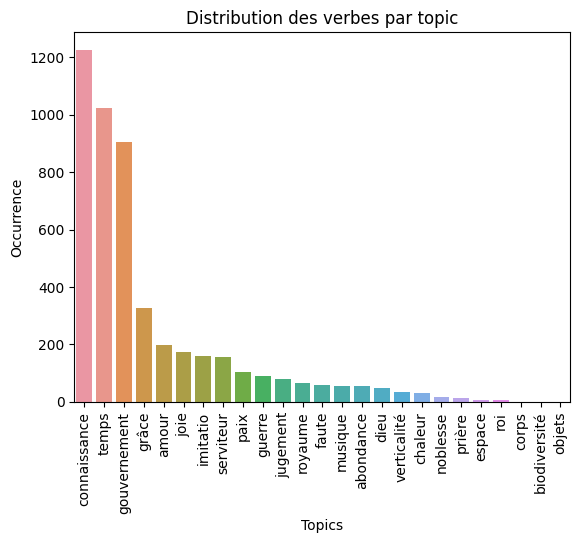

In [77]:
liste_verbes = topics_df['verbs'].tolist()

final_verbs = []

i = 0
while i <= 24:   
    
    inter = []

    for word in verbs.split():
        if word in liste_verbes[i]:
            inter.append(word)

    final_verbs.append(inter)
    
    i += 1
    
length_verbs = [len(item) for item in final_verbs]
donut = pd.DataFrame([list(topic_dico.keys()),length_verbs]).transpose()
sorted_donut = donut.sort_values(by=1, ascending=False).reset_index()
sorted_donut.pop('index')

sns.barplot(x=sorted_donut[0], y=sorted_donut[1], data=sorted_donut)

# Add labels and title
plt.xlabel('Topics')
plt.xticks(rotation=90)
plt.ylabel('Occurrence')
plt.title('Distribution des verbes par topic')
plt.savefig('topics_verbes.png',dpi=300,bbox_inches="tight")
# Show the plot
plt.show()

## distribution name topic

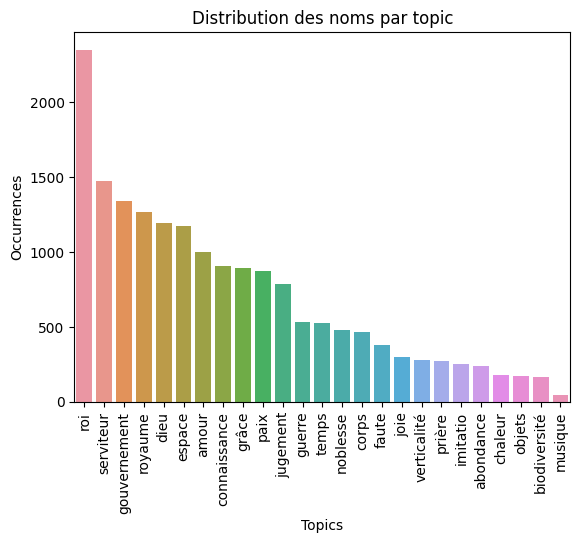

In [78]:
liste_names = topics_df['names'].tolist()

final_names = []

i = 0
while i <= 24:   
    
    inter = []

    for word in noms.split():
        if word in liste_names[i]:
            inter.append(word)

    final_names.append(inter)
    
    i += 1
    
length_names = [len(item) for item in final_names]
donut = pd.DataFrame([list(topic_dico.keys()),length_names]).transpose()
sorted_donut = donut.sort_values(by=1, ascending=False).reset_index()
sorted_donut.pop('index')

sns.barplot(x=sorted_donut[0], y=sorted_donut[1], data=sorted_donut)

# Add labels and title
plt.xlabel('Topics')
plt.xticks(rotation=90)
plt.ylabel('Occurrences')
plt.title('Distribution des noms par topic')
plt.savefig('topics_noms.png',dpi=300,bbox_inches="tight")
# Show the plot
plt.show()

## ditribution adjective topics

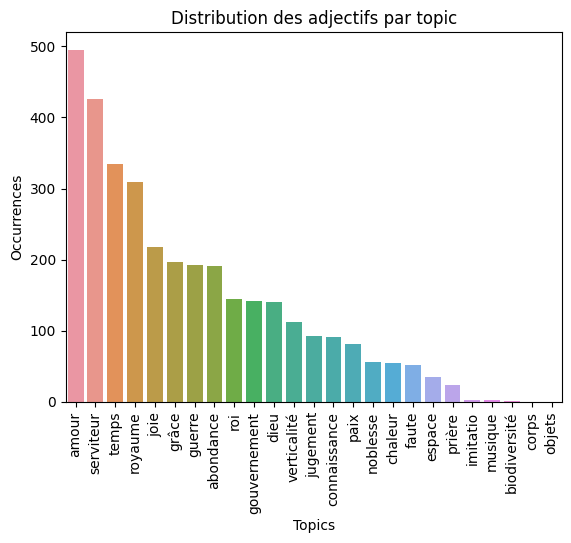

In [79]:
liste_adj = topics_df['adjectives'].tolist()

final_adj = []

i = 0
while i <= 24:   
    
    inter = []

    for word in adj.split():
        if word in liste_adj[i]:
            inter.append(word)

    final_adj.append(inter)
    
    i += 1
    
length_adj = [len(item) for item in final_adj]
donut = pd.DataFrame([list(topic_dico.keys()),length_adj]).transpose()
sorted_donut = donut.sort_values(by=1, ascending=False).reset_index()
sorted_donut.pop('index')

sns.barplot(x=sorted_donut[0], y=sorted_donut[1], data=sorted_donut)

# Add labels and title
plt.xlabel('Topics')
plt.xticks(rotation=90)
plt.ylabel('Occurrences')
plt.title('Distribution des adjectifs par topic')
plt.savefig('topics_adjectifs.png',dpi=300,bbox_inches="tight")
# Show the plot
plt.show()

In [32]:
len(df['lemma'].tolist())

363

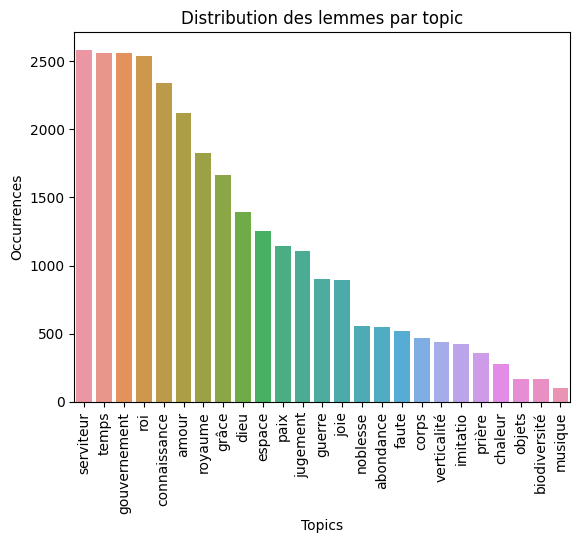

In [80]:
liste_lemma = topics_df['lemmas'].tolist()

final_lemma = []

i = 0
while i <= 24:   
    
    inter = []

    for word in lemma.split():
        if word in liste_lemma[i]:
            inter.append(word)

    final_lemma.append(inter)
    
    i += 1
    
length_lemma = [len(item) for item in final_lemma]
donut = pd.DataFrame([list(topic_dico.keys()),length_lemma]).transpose()
sorted_donut = donut.sort_values(by=1, ascending=False).reset_index()
sorted_donut.pop('index')

sns.barplot(x=sorted_donut[0], y=sorted_donut[1], data=sorted_donut)

# Add labels and title
plt.xlabel('Topics')
plt.xticks(rotation=90)
plt.ylabel('Occurrences')
plt.title('Distribution des lemmes par topic')
plt.savefig('topics_lemmes.png',dpi=300,bbox_inches="tight")
# Show the plot
plt.show()

In [82]:
values = ['serviteur','temps','gouvernement','roi','connaissance','amour','royaume','grâce','dieu','espace','paix']

matched_values = sorted_donut[sorted_donut[0].isin(values)]

total = sum(sorted_donut[1])

matched_values[1] = matched_values[1]/total
matched_values

/home/noe/python/miniconda/envs/coursnlp/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,0,1
0,serviteur,0.089337
1,temps,0.088645
2,gouvernement,0.088438
3,roi,0.087815
4,connaissance,0.080932
5,amour,0.073289
6,royaume,0.063086
7,grâce,0.05769
8,dieu,0.048179
9,espace,0.043371


In [84]:
pauline

,0
0,serviteur
1,temps
2,gouvernement
3,roi
4,connaissance
5,amour
6,royaume
7,grâce
8,dieu
9,espace


In [106]:
pauline = pd.DataFrame(values)
df.rename(columns={'0': 'topics'}, inplace=True)

for val in tqdm(range(len(df))):    
    
    test = df['lemma'][val]

    final_test = []

    i = 0
    while i <= 24:   

        inter = []

        for word in test.split():
            if word in liste_lemma[i]:
                inter.append(word)

        final_test.append(inter)

        i += 1

    length_test = [len(item) for item in final_test]
    donut = pd.DataFrame([list(topic_dico.keys()),length_test]).transpose()
    sorted_donut = donut.sort_values(by=1, ascending=False).reset_index()
    sorted_donut.pop('index')
    values = ['serviteur','temps','gouvernement','roi','connaissance','amour']

    matched_values = sorted_donut[sorted_donut[0].isin(values)]
    item = matched_values[1].tolist()

    pauline[f'pdv_{val+1}'] = item

100%|████████████████████████████████████████| 363/363 [00:01<00:00, 187.93it/s]


In [107]:
pauline_transposed = pauline.set_index(0).transpose()

In [108]:
pauline_transposed['total'] = pauline_transposed['serviteur'] + pauline_transposed['temps'] + pauline_transposed['gouvernement'] + pauline_transposed['roi'] + pauline_transposed['connaissance'] + pauline_transposed['amour']

In [110]:
pauline_transposed['serviteur'] = pauline_transposed['serviteur']/pauline_transposed['total']
pauline_transposed['temps'] = pauline_transposed['temps']/pauline_transposed['total']
pauline_transposed['gouvernement'] = pauline_transposed['gouvernement']/pauline_transposed['total']
pauline_transposed['roi'] = pauline_transposed['roi']/pauline_transposed['total']
pauline_transposed['connaissance'] = pauline_transposed['connaissance']/pauline_transposed['total']
pauline_transposed['amour'] = pauline_transposed['amour']/pauline_transposed['total']

In [111]:
pauline_transposed

,serviteur,temps,gouvernement,roi,connaissance,amour,total
pdv_1,0.256250,0.250000,0.143750,0.131250,0.112500,0.106250,160
pdv_2,0.277778,0.233333,0.155556,0.144444,0.122222,0.066667,90
pdv_3,0.284211,0.221053,0.184211,0.121053,0.110526,0.078947,190
pdv_4,0.413043,0.152174,0.130435,0.130435,0.130435,0.043478,46
pdv_5,0.271429,0.200000,0.142857,0.142857,0.128571,0.114286,70
...,...,...,...,...,...,...,...
pdv_359,0.333333,0.222222,0.222222,0.111111,0.111111,0.000000,9
pdv_360,0.400000,0.150000,0.150000,0.150000,0.100000,0.050000,20
pdv_361,0.235294,0.235294,0.176471,0.176471,0.117647,0.058824,17
pdv_362,0.294118,0.235294,0.176471,0.117647,0.117647,0.058824,17


In [89]:
test = pauline_transposed.T

In [115]:
severine = pauline_transposed['serviteur'].tolist()
severine2 = pauline_transposed['temps'].tolist()
severine3 = pauline_transposed['gouvernement'].tolist()
severine4 = pauline_transposed['roi'].tolist()
severine5 = pauline_transposed['connaissance'].tolist()
severine6 = pauline_transposed['amour'].tolist()

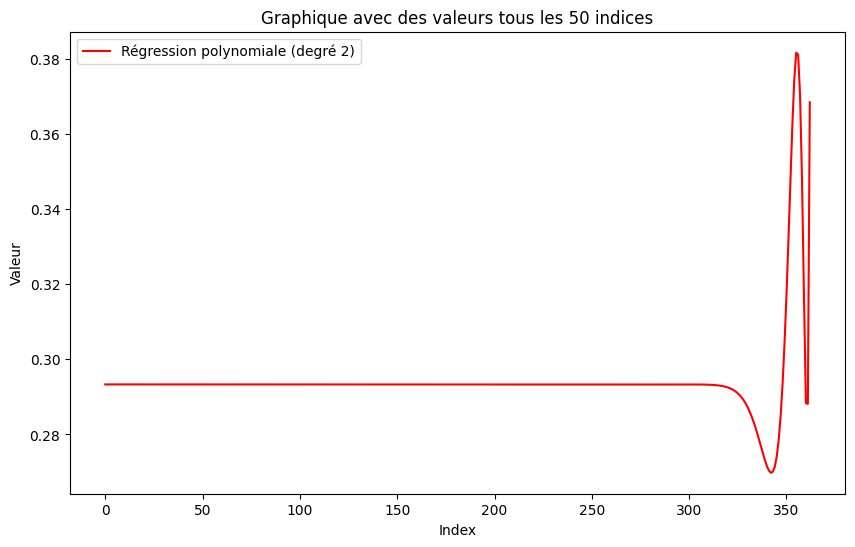

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.arange(363).reshape(-1, 1)  # Créer un tableau de 0 à 362
y = np.array(severine)
y2 = np.array(severine2)
y[np.isnan(y)] = 0
y2[np.isnan(2)] = 0

poly = PolynomialFeatures(degree=100)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure selon vos besoins
predicted_y = model.predict(x_poly)


#plt.scatter(x, y, label='Données')
plt.plot(x, predicted_y, color='red', label='Régression polynomiale (degré 2)')



# Ajouter des étiquettes et une légende
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Graphique avec des valeurs tous les 50 indices')
plt.legend()
#plt.ylim(0, 0.4)

# Afficher le graphique
plt.show()


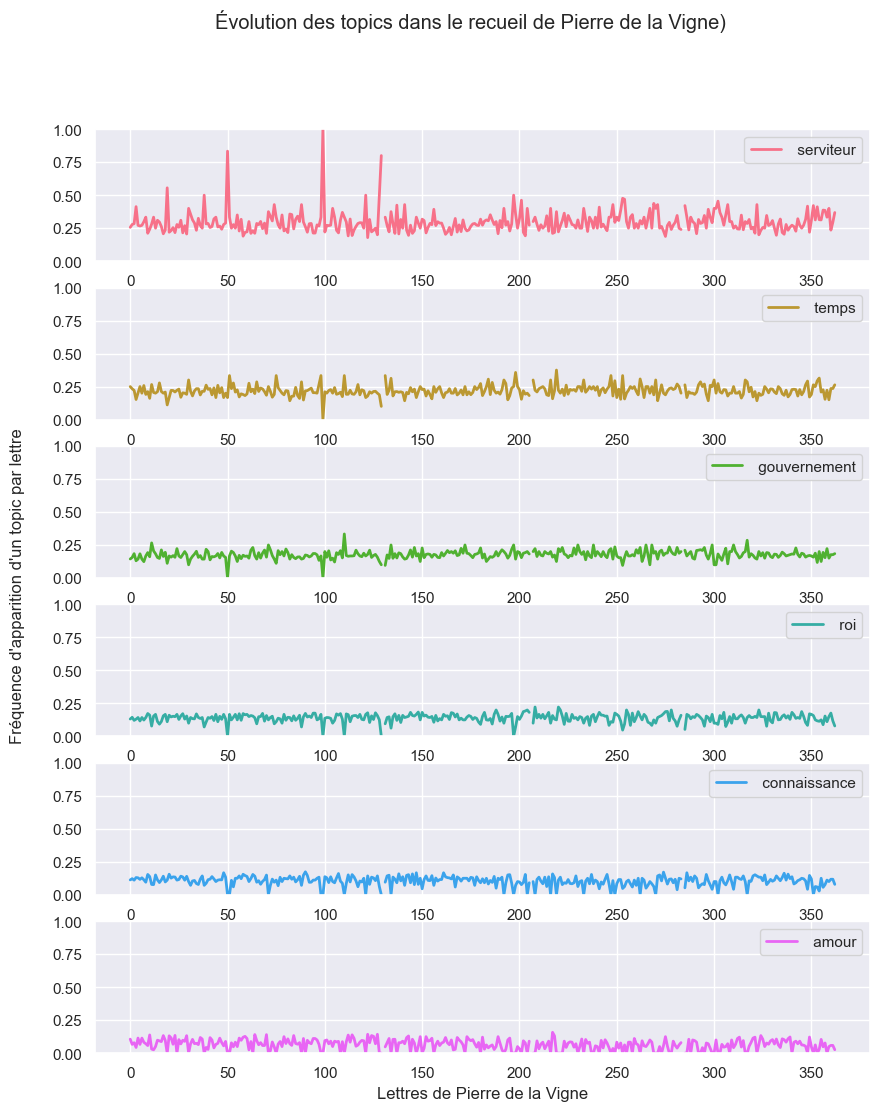

In [186]:
data = ['serviteur','temps','gouvernement','roi','connaissance','amour']

y_values = [
    severine,
    severine2,
    severine3,
    severine4,
    severine5,
    severine6
]

fig, axs = plt.subplots(nrows=6, figsize=(10, 12))
mean_values = [np.mean(y) for y in y_values]
colors = sns.color_palette("husl", n_colors=len(y_values))




x_values = np.arange(363)

for i, ax in enumerate(axs):
    ax.plot(y_values[i], label=f' {data[i]}', linewidth=2,color=colors[i])
    ax.set_ylim(0, 1)
    ax.legend()

axs[-1].set_xlabel('Lettres de Pierre de la Vigne')
fig.text(0.04, 0.5, "Fréquence d'apparition d'un topic par lettre", va='center', rotation='vertical', fontsize=12) 
plt.suptitle('Évolution des topics dans le recueil de Pierre de la Vigne)')
plt.savefig('topics_evol_pdv.png',dpi=300,bbox_inches="tight")
plt.show()

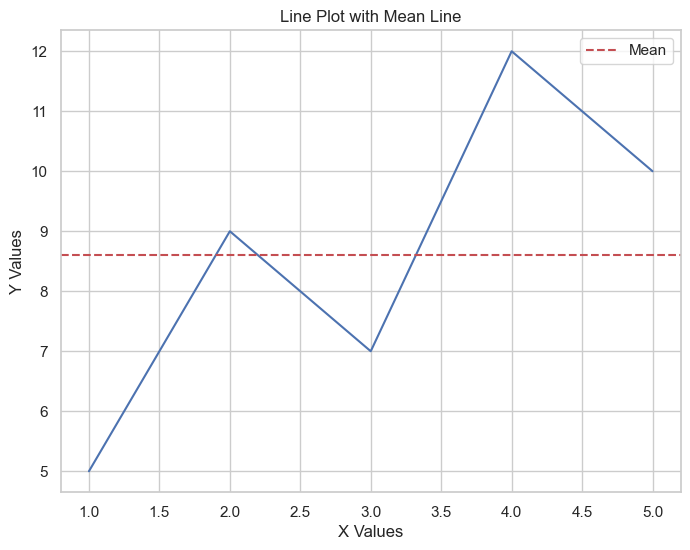

In [175]:
x_values = [1, 2, 3, 4, 5]
y_values = [5, 9, 7, 12, 10]

# Create a line plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Plot the line
sns.lineplot(x=x_values, y=y_values)

# Calculate the mean of y_values
mean_y = sum(y_values) / len(y_values)

# Add a mean line to the plot
plt.axhline(y=mean_y, color='r', linestyle='--', label='Mean')

# Set plot title and labels
plt.title('Line Plot with Mean Line')
plt.xlabel('X Values')
plt.ylabel('Y Values')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [107]:
def bigrams_counter(sentence):

    return Counter(create_bigrams(sentence)).most_common()

In [126]:
pos = df['pos'].tolist()
pos2 = ' '.join(pos)
Counter(create_bigrams(pos2)).most_common()

[(('NOMcom', 'VER'), 5323),
 (('NOMcom', 'NOMcom'), 5129),
 (('PRE', 'NOMcom'), 3468),
 (('VER', 'NOMcom'), 3254),
 (('ADJqua', 'NOMcom'), 2900),
 (('VER', 'VER'), 2794),
 (('NOMcom', 'PROpos'), 2490),
 (('NOMcom', 'ADJqua'), 2148),
 (('ADV', 'VER'), 1967),
 (('CONcoo', 'NOMcom'), 1920),
 (('NOMcom', 'CONcoo'), 1849),
 (('VER', 'PRE'), 1743),
 (('PROpos', 'NOMcom'), 1674),
 (('VER', 'CONcoo'), 1610),
 (('NOMcom', 'PRE'), 1389),
 (('VER', 'ADV'), 1233),
 (('VER', 'CONsub'), 1161),
 (('VER', 'PUNC'), 1158),
 (('ADJqua', 'VER'), 1126),
 (('NOMcom', 'ADV'), 1098),
 (('VER', 'ADJqua'), 935),
 (('PROdem', 'NOMcom'), 928),
 (('ADV', 'NOMcom'), 802),
 (('PRE', 'PROdem'), 776),
 (('PROpos', 'VER'), 755),
 (('NOMcom', 'PROrel'), 742),
 (('PRE', 'ADJqua'), 735),
 (('CONcoo', 'VER'), 696),
 (('CONcoo', 'ADJqua'), 691),
 (('NOMcom', 'PROdem'), 640),
 (('PROind', 'NOMcom'), 604),
 (('ADV', 'PRE'), 540),
 (('CONsub', 'NOMcom'), 533),
 (('ADVneg', 'VER'), 516),
 (('PROrel', 'NOMcom'), 506),
 (('ADJqua

In [51]:
len(df[df['livre'] == 'Livre 6'])

32

In [82]:
def split(sentence):
    return sentence.split()

In [71]:
tangara = df['split'].tolist()
liste2 = [element for sub_list in tangara for element in sub_list]
x = dict(Counter(liste2).most_common())
sum(1 for value, count in x.items() if count != 1)

4376

In [76]:
len(list(set(liste2)))

7348

Tableau avec les 3 mots de chaque catégorie les plus représentés

In [ ]:
topic_lexicons = topics_df['lemmas'].tolist()

In [ ]:
df.to_excel('lemma_pos_pdv.xlsx')